Análise de filmes de Hollywood 2023

In [ ]:
# Descidi baixar o dataset via API com "baixar_dataset.py" para praticar o uso de APIs e requests
# Depois de baixar o dataset, vou explorar os dados com pandas e matplotlib

import os
import pandas as pd

# Carrega o arquivo CSV em um DataFrame do pandas
arquivo_csv = os.path.join("datasets", "movies", "Highest_Holywood_Grossing_Movies.csv")
df = pd.read_csv(arquivo_csv)

# Visualiza as 5 primeiras linhas do DataFrame
df.head()


,Unnamed: 0,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
0,0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
3,3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13
4,4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13


KPIs Básicos (Lucro e Retorno de Investimento / profit e ROI)

In [ ]:
# Foi necessário cria essa função para limpar valores inválidos que causavam erro na conversão de tipos
def limpar_valores(x):
    try:
        # Remover simbolo e vírgula
        x = str(x).replace('$', '').replace(',', '')
        #converte para float
        return float(x)
    except ValueError:
        return None
    
# Aplica a função de limpeza nas colunas 'Budget (in $)' e 'World Wide Sales (in $)'
df['Budget (in $)'] = df['Budget (in $)'].apply(limpar_valores)
df['World Wide Sales (in $)'] = df['World Wide Sales (in $)'].apply(limpar_valores)


In [9]:
# Cria a coluna de Lucro(profit): receita - orçamento
df['Profit'] = df['World Wide Sales (in $)'] - df['Budget (in $)']

# Cria a coluna de Retorno de Investimento (ROI - Return on Investment): lucro / orçamento
df['ROI'] = df['Profit'] / df['Budget (in $)']


In [10]:
df[['Title', 'Budget (in $)', 'World Wide Sales (in $)', 'Profit', 'ROI']].head()

,Title,Budget (in $),World Wide Sales (in $),Profit,ROI
0,Avatar,237000000.0,2.923706e+09,2.686706e+09,11.336312
1,Avengers: Endgame,356000000.0,2.799439e+09,2.443439e+09,6.863593
2,Avatar: The Way of Water,NaN,2.320250e+09,NaN,NaN
3,Titanic,200000000.0,2.264743e+09,2.064743e+09,10.323717
4,Star Wars: Episode VII - The Force Awakens,245000000.0,2.071310e+09,1.826310e+09,7.454327


Explorar com visualizações do pyplot

1) Gráfico de dispersão: Receita vs Orçamento

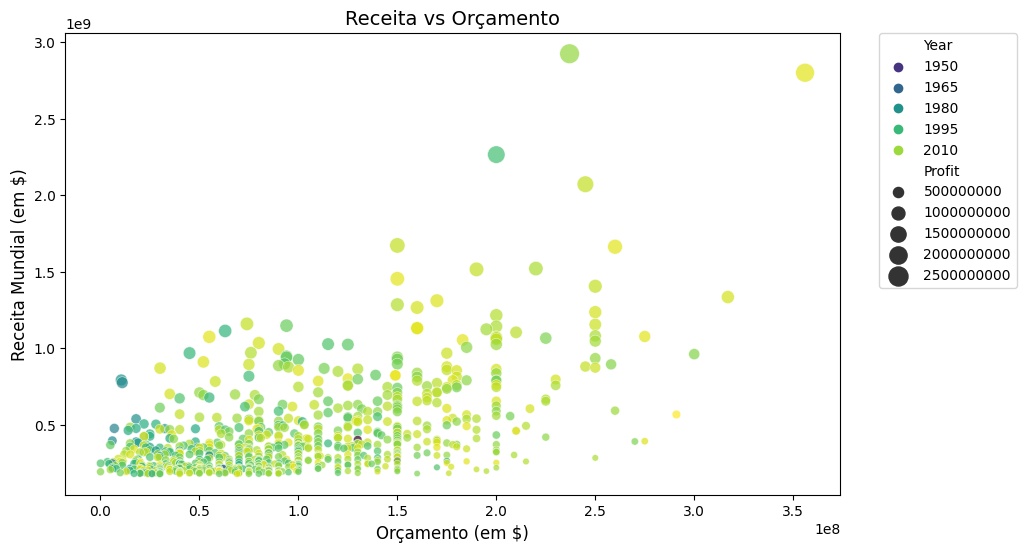

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

# Explorar com visualizações do pyplot
# Receita vs Orçamento

#Define o tamanho da figura (10 x 6)
plt.figure(figsize = (10,6))

#Cria um gráfico de dispersão (scatterplot)
sb.scatterplot(
    data = df, # DataFrame
    x = "Budget (in $)", # Orçamento
    y = "World Wide Sales (in $)", # Receita Mundial
    hue = "Year", # Ano
    size = "Profit", # Tamanho dos pontos baseado no lucro
    palette = "viridis", # Paleta de cores
    sizes = (20, 200), # Tamanho mínimo e máximo dos pontos
    alpha = 0.7   # Transparência dos pontos
)

#Adiciona título e rótulos aos eixos
plt.title("Receita vs Orçamento", fontsize = 14)

# Nomeia os eixos
plt.xlabel("Orçamento (em $)", fontsize = 12)
plt.ylabel("Receita Mundial (em $)", fontsize = 12)

# Ajusta a legenda para fora do gráfico (facilita a visualização)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Exibe o gráfico
plt.show()

2) Gráfico de barras: Receita média por gênero (Top 10)

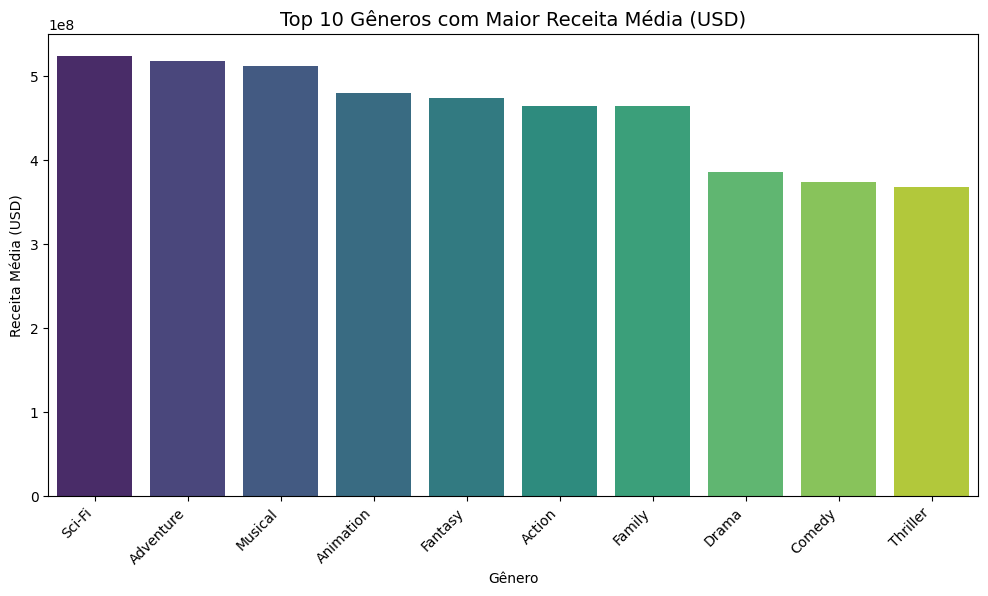

In [16]:
# Garantir que a coluna esteja no formato string e separar os gêneros
df["Genre"] = df["Genre"].astype(str).str.replace("[", "").str.replace("]", "").str.replace("'", "")

# Precisamos tratar a coluna "Genre" (Gênero do filme) pois contém vários gêneros separados por vírgula na mesma célula.
# O explode() do pandas ajuda a separar os gêneros criando uma nova linha para cada gênero repetindo o nome do filme.
# Assim podemos analisar os gêneros de forma mais eficaz.
df_explode = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")
df_explode["Genre"] = df_explode["Genre"].str.strip()  # remove espaços extras

# Calcular receita média por gênero
df_genre_mean = (
    df_explode.groupby("Genre")["World Wide Sales (in $)"]
    .mean()
    .sort_values(ascending=False)
)

# Plotar apenas os 15 gêneros mais lucrativos
top_genres = df_genre_mean.head(10)

plt.figure(figsize=(12,6))
sb.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Gêneros com Maior Receita Média (USD)", fontsize=14)
plt.ylabel("Receita Média (USD)")
plt.xlabel("Gênero")
plt.show()


In [18]:
# Outro gráfico de barras usando plotly para interatividade
# Ao passar o mouse sobre as barras, podemos ver os valores exatos
# Além disso, podemos ampliar e salvar o gráfico como imagem
import plotly.express as px

fig = px.bar(
    top_genres, 
    x=top_genres.index, # Gênero
    y=top_genres.values, # Receita Média
    labels={"x": "Gênero", "y": "Receita Média Mundial (USD)"}, # Rótulos dos eixos
    title="Top 10 Gêneros com Maior Receita Média (em USD)", # Título do gráfico
    color=top_genres.values, # Cor baseada na receita média
    color_continuous_scale="viridis" # Escala de cores 
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()
